In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('clustering behavior.csv')

In [3]:
df.head()

,player_id,total_matches,active_days,matches_per_active_day
0,--AZyG3uSuPSQDDZObYfDNHNn9F4T2ADZDB9pMPsu3my2T...,1,1,1.0
1,--FpKd5T7erv5-Ztr-3QgzV_UpC-84nbDOZmgFVLT9zmwa...,1,1,1.0
2,--LXXLAKqvpwdZaCcgudmX5FWHqhEX-eG3peB1GPoFFQaU...,1,1,1.0
3,-_CFyiqGuXct4ToceBTBjrv9y1D1Xq_VL64UL03yduIjSm...,1,1,1.0
4,-_smzsD5p1NHEiOJhOV_j0syKqRfYLvDoG92jGO5Q9MCd5...,1,1,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12760 entries, 0 to 12759
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   player_id               12760 non-null  object 
 1   total_matches           12760 non-null  int64  
 2   active_days             12760 non-null  int64  
 3   matches_per_active_day  12760 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 398.9+ KB


In [5]:
X = df.drop('player_id', axis=1)

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
from sklearn.cluster import KMeans

In [9]:
inertia = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

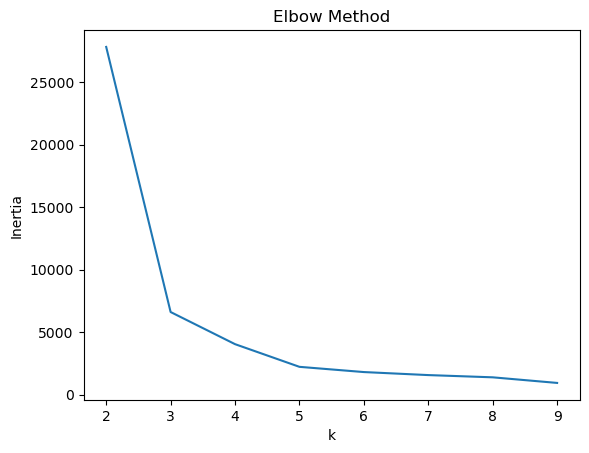

In [10]:
plt.plot(range(2,10), inertia)
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.savefig('Kmeans_Graph.png', dpi=300, bbox_inches='tight')
plt.show()

In [12]:
kmeans = KMeans(n_clusters=3, random_state=42)
X['Cluster'] = kmeans.fit_predict(X_scaled)

In [17]:
summary = X.groupby('Cluster').agg({
    'total_matches': 'mean',
    'active_days': 'mean',
    'matches_per_active_day': 'mean'
}).round(2)
print(summary)

         total_matches  active_days  matches_per_active_day
Cluster                                                    
0                 8.07         3.27                    2.25
1                 1.01         1.01                    1.00
2               776.33       152.00                    5.15


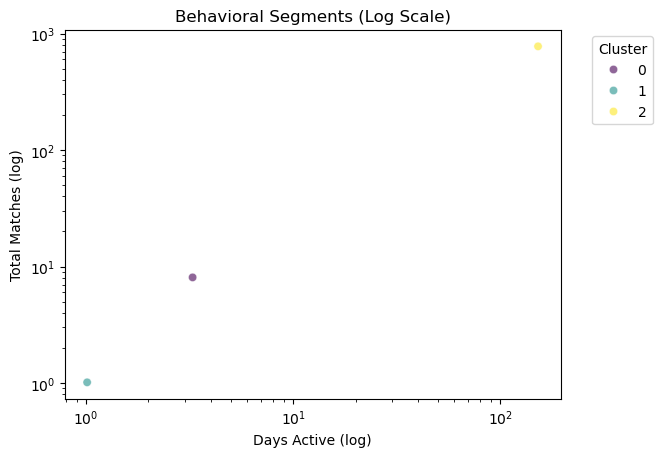

In [16]:
# Scatter plot: Total Matches vs Active Days
sns.scatterplot(
    data=summary,
    x='active_days',
    y='total_matches',
    hue='Cluster',
    palette='viridis',
    alpha=0.6
)
plt.xscale('log')
plt.yscale('log')
plt.title('Behavioral Segments (Log Scale)')
plt.xlabel('Days Active (log)')
plt.ylabel('Total Matches (log)')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('behavioral_segments.png', dpi=300, bbox_inches='tight')
plt.show()

In [18]:
summary = summary.reset_index()   # adds 'Cluster' as a column
cluster_names = {
    0: 'Core Players',
    1: 'Casual Players',
    2: 'Extreme Players'
}
summary['Segment_Name'] = summary['Cluster'].map(cluster_names)

In [19]:
print(summary)

   Cluster  total_matches  active_days  matches_per_active_day  \
0        0           8.07         3.27                    2.25   
1        1           1.01         1.01                    1.00   
2        2         776.33       152.00                    5.15   

      Segment_Name  
0     Core Players  
1   Casual Players  
2  Extreme Players  


In [20]:
summary.to_csv('users_with_segments.csv', index=False)

In [33]:
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [48]:
summary = df.groupby('Cluster').agg({
    'total_matches': 'mean',
    'active_days': 'mean',
    'matches_per_active_day': 'mean'
}).round(2)
print(summary)

         total_matches  active_days  matches_per_active_day
Cluster                                                    
0                 8.07         3.27                    2.25
1                 1.01         1.01                    1.00
2               776.33       152.00                    5.15


In [49]:
df.head()

,total_matches,active_days,matches_per_active_day
Cluster,,,
0,8.07,3.27,2.25
1,1.01,1.01,1.00
2,776.33,152.00,5.15


In [21]:
events_df = pd.read_csv('events.csv')

In [22]:
events_df.head()

,event_id,event_name,event_timestamp,player_id,match_id,event_type
0,1,match_played,2024-07-21 18:18:16.240,_L6PDa-YlzQX1_Xo-ZxzngVEM_WIyjVlVs0FHyKQv5-NYh...,EUW1_7026194224,engagement
1,2,match_played,2024-07-21 18:18:16.240,aJ750DxT1LhERbv73_4mAlNxsT3yOpi2ZNoP_Ut3DoJ7-u...,EUW1_7026194224,engagement
2,3,match_played,2024-07-21 18:18:16.240,BL9rwzIeRYJZLiX4gjAQFIhxLj_72WcqMkUhhR1hc4mMX9...,EUW1_7026194224,engagement
3,4,match_played,2024-07-21 18:18:16.240,DecAcZNLK4cty3VM_mv4EI0CX3PFAyNDjvdw7jZk-Q9TDu...,EUW1_7026194224,engagement
4,5,match_played,2024-07-21 18:18:16.240,E8Cesv3zGv_yyWAsD2n_6h-edymaVzRDzjuLgP3C0j6h5O...,EUW1_7026194224,engagement


In [24]:
events_df['event_timestamp'] = pd.to_datetime(events_df['event_timestamp'])

In [25]:
# Get last activity per player
last_activity = (
    events_df
    .groupby('player_id')['event_timestamp']
    .max()
    .reset_index()
)

# Define 14-day cutoff
cutoff_date = events_df['event_timestamp'].max() - pd.Timedelta(days=14)

# Create retention flag
last_activity['retained_14d'] = (
    last_activity['event_timestamp'] >= cutoff_date
).astype(int)

last_activity.head()

,player_id,event_timestamp,retained_14d
0,--AZyG3uSuPSQDDZObYfDNHNn9F4T2ADZDB9pMPsu3my2T...,2025-10-25 00:39:04.053,0
1,--FpKd5T7erv5-Ztr-3QgzV_UpC-84nbDOZmgFVLT9zmwa...,2025-01-14 01:30:46.017,0
2,--LXXLAKqvpwdZaCcgudmX5FWHqhEX-eG3peB1GPoFFQaU...,2025-02-25 16:59:20.457,0
3,-09N6siH67ASGOAtG891bcNvW_BcR_NXSUWn9HqyNDt3SI...,2025-12-06 02:27:43.573,1
4,-11XjXT7DK3uixi8IksO7gbdVXiRc1dFb6H8UFlURO8a1a...,2024-10-03 21:07:43.167,0


In [ ]:
df_with_retention = df.merge(
    last_activity[['player_id', 'retained_14d']],
    on='player_id',
    how='left'
)

In [51]:
df_with_retention.head()

,player_id,total_matches,active_days,matches_per_active_day,Cluster,retained_14d
0,--AZyG3uSuPSQDDZObYfDNHNn9F4T2ADZDB9pMPsu3my2T...,1,1,1.0,1,0
1,--FpKd5T7erv5-Ztr-3QgzV_UpC-84nbDOZmgFVLT9zmwa...,1,1,1.0,1,0
2,--LXXLAKqvpwdZaCcgudmX5FWHqhEX-eG3peB1GPoFFQaU...,1,1,1.0,1,0
3,-_CFyiqGuXct4ToceBTBjrv9y1D1Xq_VL64UL03yduIjSm...,1,1,1.0,1,1
4,-_smzsD5p1NHEiOJhOV_j0syKqRfYLvDoG92jGO5Q9MCd5...,1,1,1.0,1,0


In [53]:
df_with_retention = df_with_retention.reset_index()   # adds 'Cluster' as a column
cluster_names = {
    0: 'Core Players',
    1: 'Casual Players',
    2: 'Extreme Players'
}
df_with_retention['Segment_Name'] = df_with_retention['Cluster'].map(cluster_names)

In [54]:
df_with_retention.head()

,index,player_id,total_matches,active_days,matches_per_active_day,Cluster,retained_14d,Segment_Name
0,0,--AZyG3uSuPSQDDZObYfDNHNn9F4T2ADZDB9pMPsu3my2T...,1,1,1.0,1,0,Casual Players
1,1,--FpKd5T7erv5-Ztr-3QgzV_UpC-84nbDOZmgFVLT9zmwa...,1,1,1.0,1,0,Casual Players
2,2,--LXXLAKqvpwdZaCcgudmX5FWHqhEX-eG3peB1GPoFFQaU...,1,1,1.0,1,0,Casual Players
3,3,-_CFyiqGuXct4ToceBTBjrv9y1D1Xq_VL64UL03yduIjSm...,1,1,1.0,1,1,Casual Players
4,4,-_smzsD5p1NHEiOJhOV_j0syKqRfYLvDoG92jGO5Q9MCd5...,1,1,1.0,1,0,Casual Players


In [55]:
retention_by_cluster = (
    df_with_retention
    .groupby('Segment_Name')
    .agg(
        player_count=('player_id', 'count'),
        retention_14d=('retained_14d', 'mean')
    )
    .reset_index()
)

retention_by_cluster['churn_14d'] = 1 - retention_by_cluster['retention_14d']
retention_by_cluster

,Segment_Name,player_count,retention_14d,churn_14d
0,Casual Players,12502,0.138058,0.861942
1,Core Players,255,0.254902,0.745098
2,Extreme Players,3,1.000000,0.000000


In [56]:
retention_by_cluster.to_csv('users_with_segments_with_retention.csv', index=False)

In [57]:
df_with_retention.to_csv('users_with_segments_with_id.csv', index=False)